# Análise da base de dados da AppleStore

Todas as análises foram feitas a partir do banco de dados https://www.kaggle.com/datasets/calibr3io/applestore


**Esta base de dados foi usada para fins de práticas e estudos de ciência de dados, pode ser que esses dados estejam desatualizados ou que não sejam verdadeiros.**

## Sobre as colunas (características)

Este dataset contém 16 colunas (características)

1. id: Id do aplicativo
2. track_name: Nome do aplicativo
3. size_bytes: Tamanho do aplicativo
4. currency: O tipo de moeda (se for pago)
5. price: O preço do aplicativo (se tiver)
6. rating_count_tot: O rating total de todas as versões do aplicativo
7. rating_count_ver: O rating atual da última versão do aplicativo
8. user_rating: O rating médio de todos as versões do aplicativo
9. user_rating_ver: O rating médio atual da última versão do aplicativo
10. ver: Versão atual do aplicativo
11. cont_rating: Classificação do aplicativo
12. prime_genre: Gênero do aplicativo
13. sup_devices.num: Quantidade de celulares Apple que suporta este aplicativo
14. ipadSc_urls.num: Número de screenshots do aplicativo disponíveis para iPad
15. lang.num: Número de idiomas suportados pelo aplicativo
16. vpp_lic:  Indica se o aplicativo possui licenciamento do Volume Purchase Program (VPP)

# Análise de Dados

Pipeline

1. Coleta dos dados
2. Pré-processamento dos dados
3. Análise exploratória dos dados


In [250]:
# Removendo os warnings
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

## 1. Coleta dos dados

In [251]:
# Importando o pandas
import pandas as pd

# Obtendo os dados
data = pd.read_csv('/content/drive/MyDrive/Projetos/Data/datasets para estudar/AppleStore.csv')

In [252]:
# Exibindo os 5 primeiros dados
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [253]:
# Exibindo os 5 últimos dados
data.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1
7196,977965019,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,51174400,USD,0.0,0,0,0.0,0.0,1.4.0,4+,Food & Drink,37,0,1,1


In [254]:
# Aqui conseguimos ver melhor os tipos de dados e se há dados faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

## 2. Pré-processamento dos dados

A limpeza inicial que podemos fazer é remover a coluna 'currency' que não é importante para a análise já que todos os preços dos aplicativos estão em dolar.

In [255]:
# Analisando a frequência
data['currency'].describe()

count     7197
unique       1
top        USD
freq      7197
Name: currency, dtype: object

In [256]:
# Removendo o currency
data.drop(['currency'], axis=1, inplace=True)

Outra coluna que também não nos fará falta nesta análise é o 'id'.

In [257]:
# Removendo o id
data.drop(['id'], axis=1, inplace=True)

In [258]:
data.head(5)

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Facebook,389879808,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,Instagram,113954816,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,Clash of Clans,116476928,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,Temple Run,65921024,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,Pandora - Music & Radio,130242560,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## 3. Análise Exploratória dos dados

### 3.1. Quais são os gêneros e suas frequências?

In [259]:
# importando o pacote que usaremos para visualizar os dados
import matplotlib.pyplot as plt

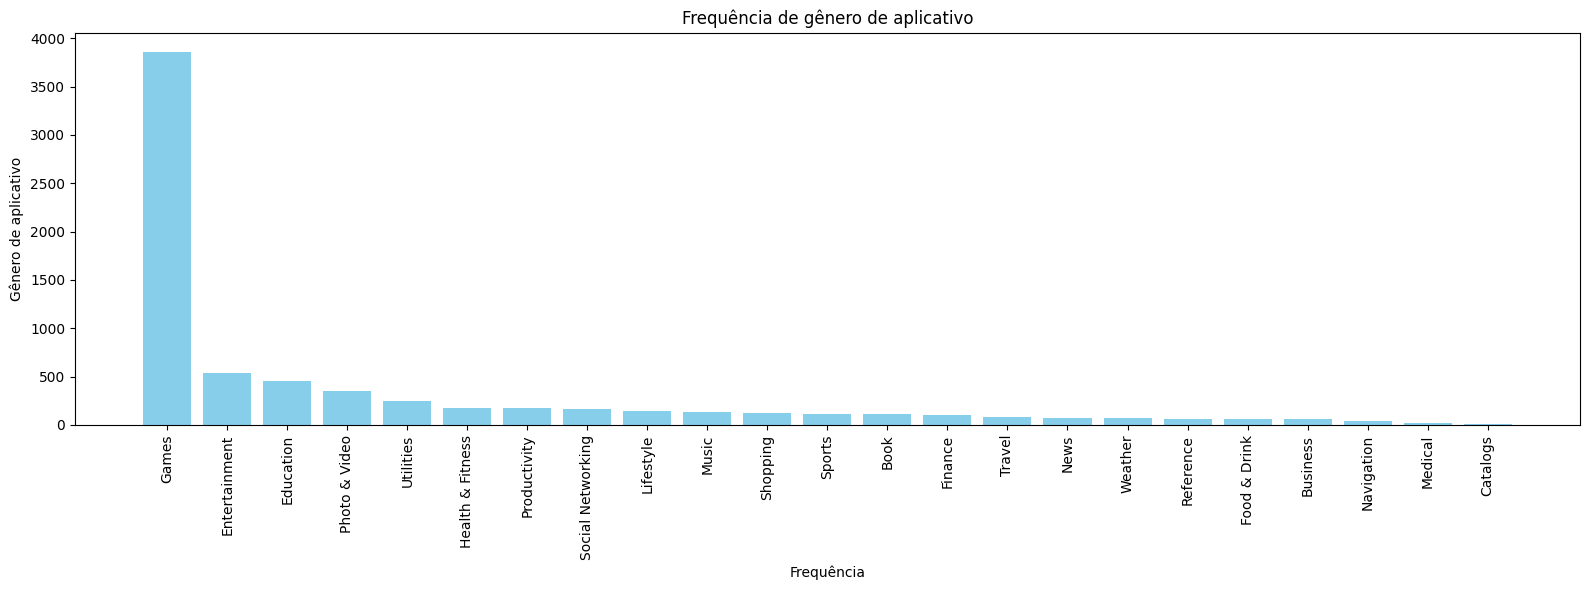

In [260]:
# Agrupando os dados
data_genre = data.groupby('prime_genre').size()

# Ordenando eles
data_genre = data_genre.sort_values(ascending=False)

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(data_genre.index, data_genre.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Frequência')
plt.ylabel("Gênero de aplicativo")
plt.title('Frequência de gênero de aplicativo')
plt.tight_layout()
plt.show()

In [261]:
# Mostrando os dados
data_genre

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
dtype: int64

### 3.2. Qual gênero tem mais avaliação?

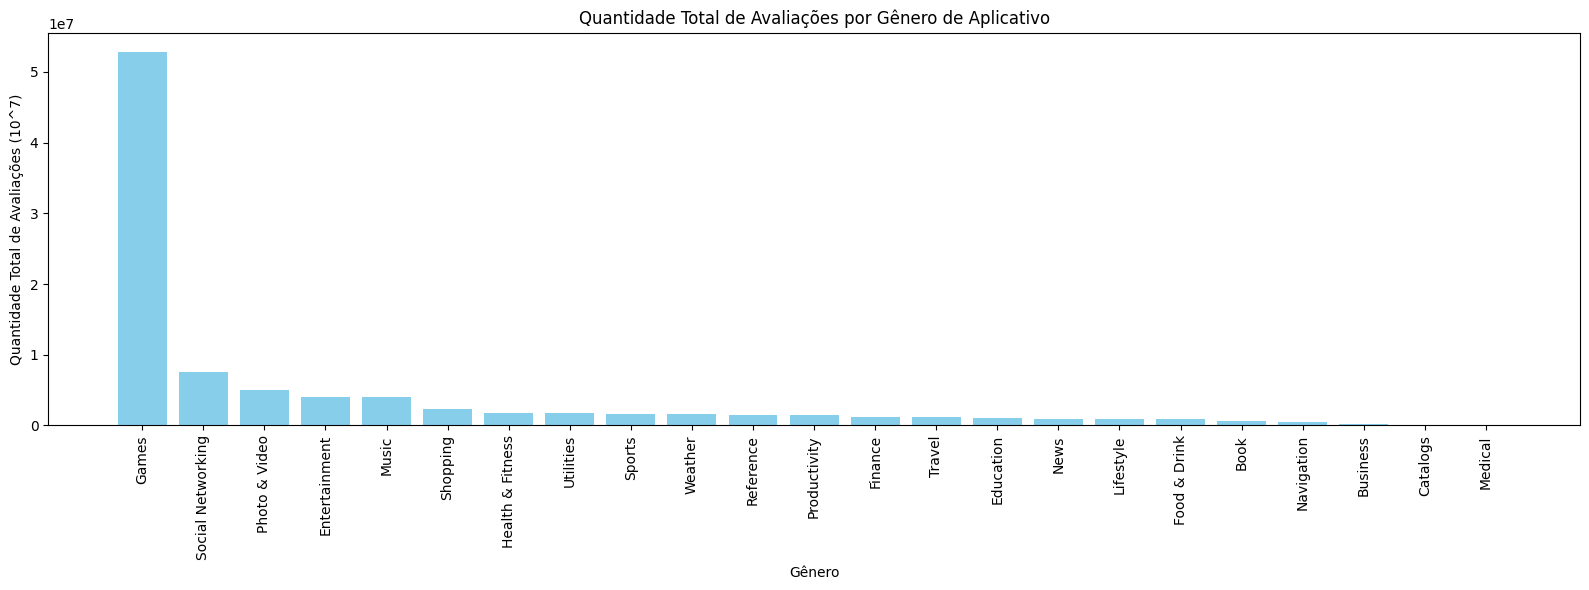

In [262]:
# Agrupando os dados
genre_ratings = data.groupby('prime_genre')['rating_count_tot'].sum()

# Ordenando os dados
genre_ratings = genre_ratings.sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(16, 6))
plt.bar(genre_ratings.index, genre_ratings.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Quantidade Total de Avaliações (10^7)')
plt.title('Quantidade Total de Avaliações por Gênero de Aplicativo')
plt.tight_layout()
plt.show()

In [263]:
# Mostrando os dados
genre_ratings

prime_genre
Games                52878491
Social Networking     7598316
Photo & Video         5008946
Entertainment         4030518
Music                 3980199
Shopping              2271070
Health & Fitness      1784371
Utilities             1702228
Sports                1599070
Weather               1597034
Reference             1434294
Productivity          1433136
Finance               1148956
Travel                1144485
Education             1014371
News                   976130
Lifestyle              887294
Food & Drink           878133
Book                   574049
Navigation             545282
Business               272921
Catalogs                17325
Medical                 13634
Name: rating_count_tot, dtype: int64

### 3.3. Qual é classificação de idade que mais predomina na Apple Store?

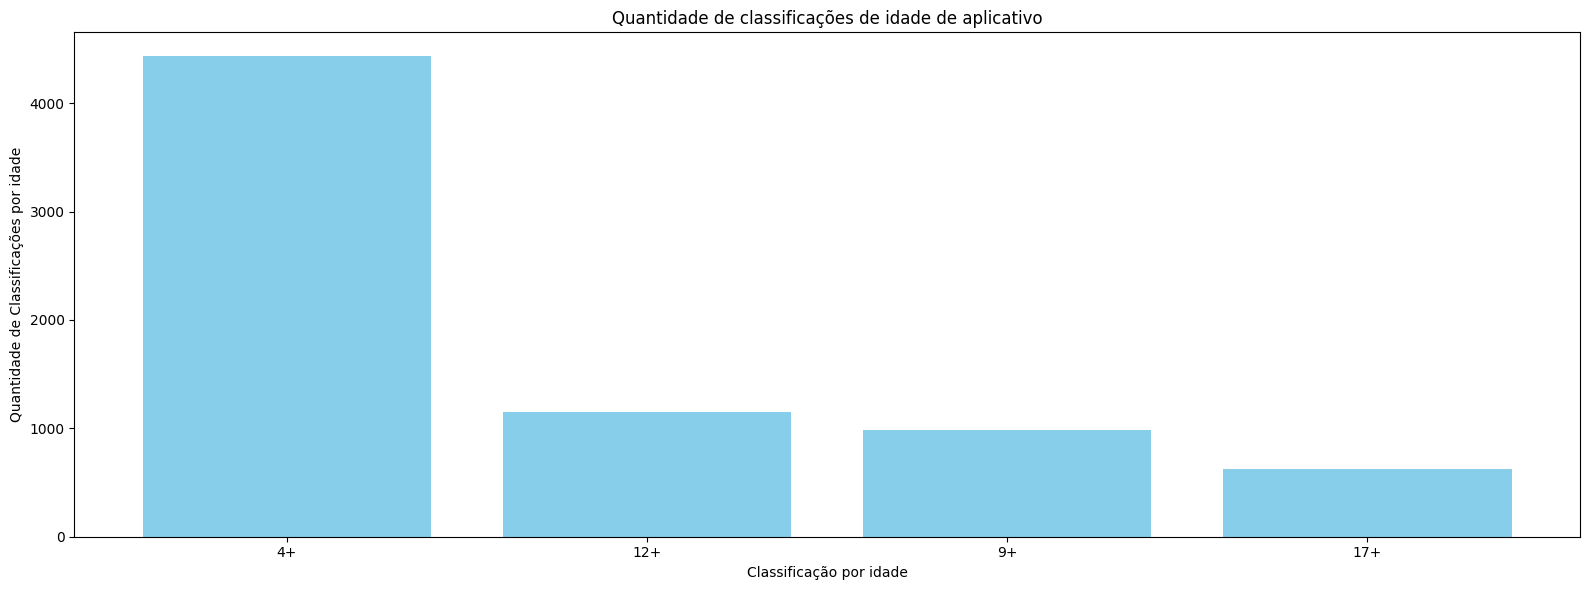

In [264]:
# Agrupando os dados
data_class = data.groupby('cont_rating').size()

# Ordenando os dados
data_class = data_class.sort_values(ascending=False)

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(data_class.index, data_class.values, color='skyblue')
plt.xlabel('Classificação por idade')
plt.ylabel('Quantidade de Classificações por idade')
plt.title('Quantidade de classificações de idade de aplicativo')
plt.tight_layout()
plt.show()

In [265]:
# Mostrando os dados
data_class

cont_rating
4+     4433
12+    1155
9+      987
17+     622
dtype: int64

### 3.4. Tem mais aplicativo pago ou gratuito?

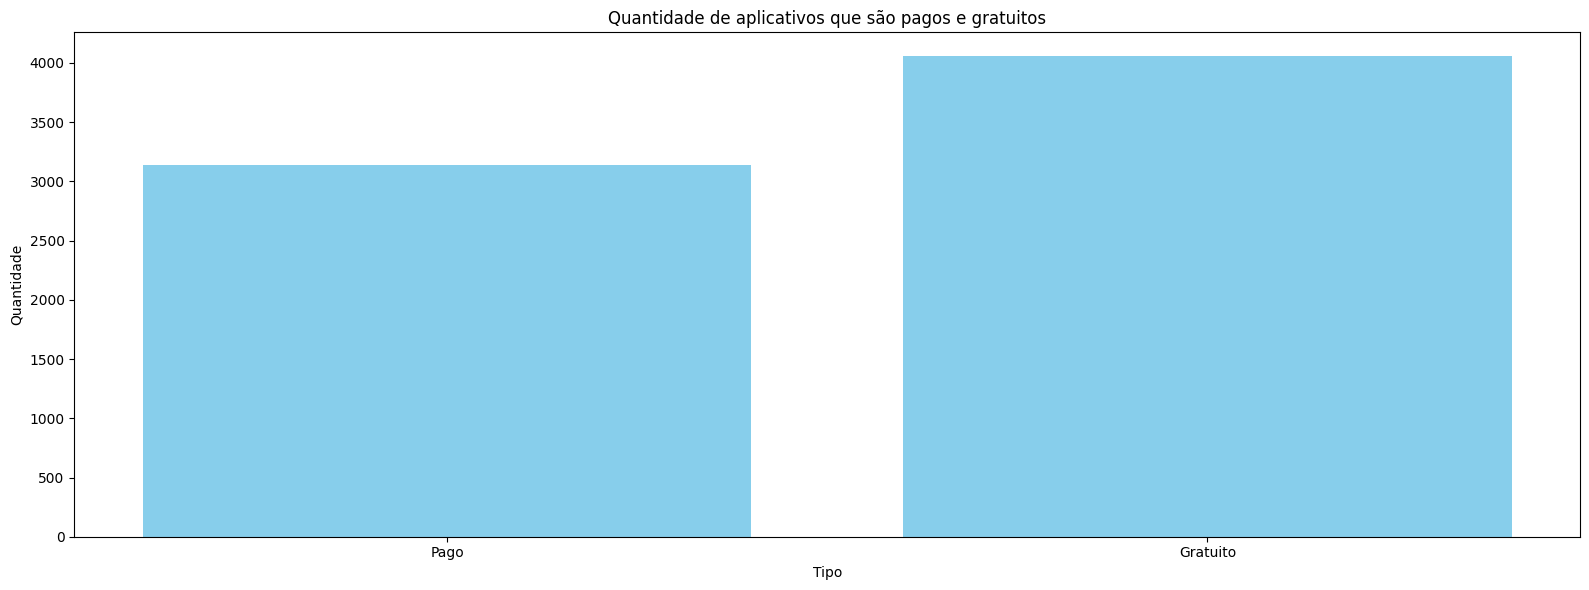

In [266]:
# Obtendo a quantidade entre pagos e gratuitos
qtd_pago = len(data[data['price'] > 0])
qtd_livre = len(data[data['price'] == 0])

# Criando o dataframe
df_valores = pd.DataFrame({'Tipo': ["Pago", "Gratuito"], 'Valores': [qtd_pago, qtd_livre]})

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(df_valores['Tipo'], df_valores['Valores'], color='skyblue')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('Quantidade de aplicativos que são pagos e gratuitos')
plt.tight_layout()
plt.show()

In [267]:
df_valores['Valores'][0] / df_valores['Valores'][1]

0.7744082840236687

### 3.5. Entre os aplicativos pagos, qual é o gênero com maior receita?

In [268]:
# Obtendo apenas os dados pagos
data_price = data[data['price'] > 0]

# Mostrando a nova tabela
data_price

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
11,Fruit Ninja Classic,104590336,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
17,Clear Vision (17+),37879808,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1
18,Minecraft: Pocket Edition,147787776,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1
28,Plants vs. Zombies,105379840,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
37,Doodle Jump,48741376,0.99,395261,88,4.5,4.5,3.17.6,4+,Games,37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,Bestshot: Take Clear Photos Automatically & Ea...,24675328,0.99,0,0,0.0,0.0,2.0.2,4+,Photo & Video,37,0,2,1
7182,Be-be-bears!,480781312,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7184,弑仙问情,151494656,0.99,0,0,0.0,0.0,1,9+,Games,40,5,1,1
7186,Hey Duggee: We Love Animals,136347648,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1


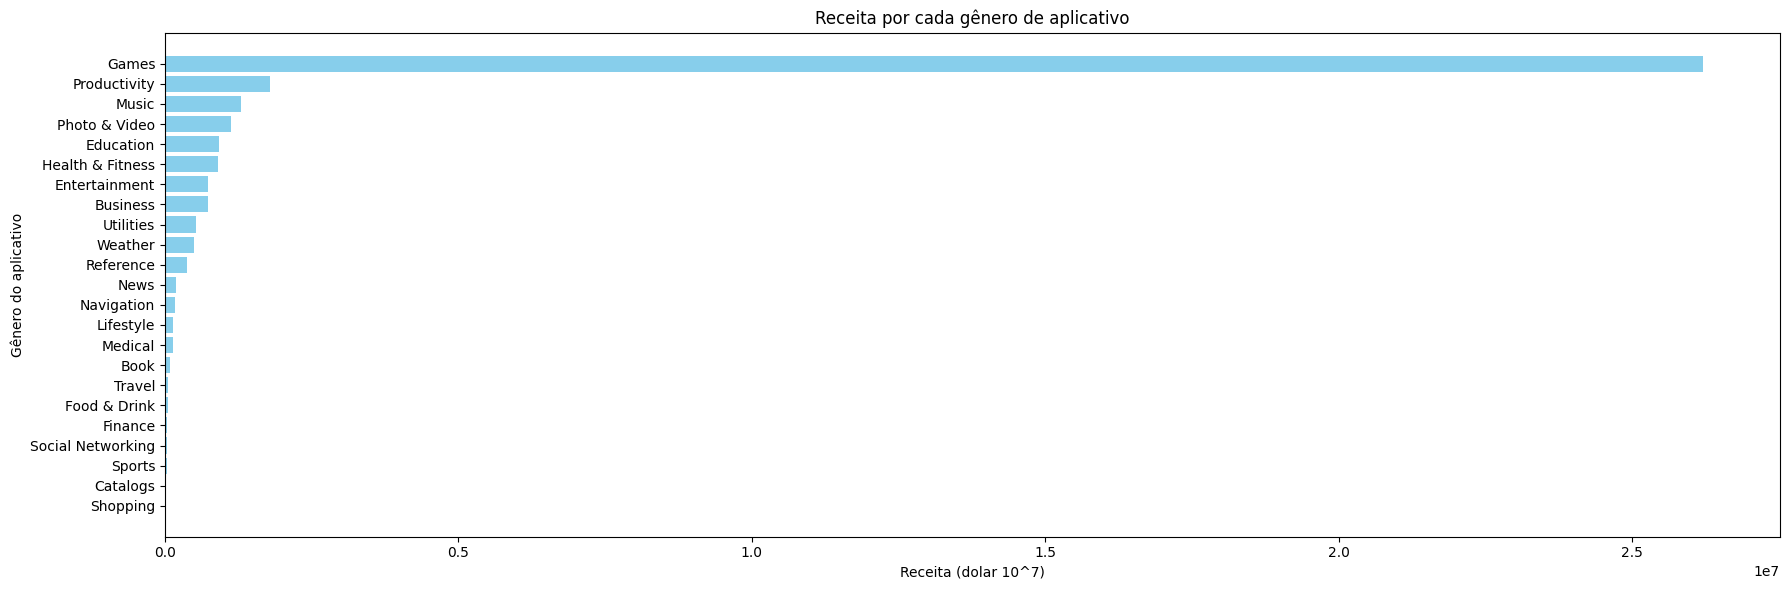

In [269]:
# Criando um novo dataframe com as colunas para fazer o cálculo da receita
data_price = data_price[['price', 'rating_count_tot', 'prime_genre']]

# Multiplicando o preço pelas avaliações (considerando que cada avaliação é uma pessoa)
data_price['total value'] = data_price['price'] * data_price['rating_count_tot']

# Group Data Price
gdp = data_price.groupby('prime_genre')['total value'].sum()

# Ordenando os dados
gdp = gdp.sort_values(ascending=True)

# Construindo o gráfico
plt.figure(figsize=(18, 6))
plt.barh(gdp.index, gdp.values, color='skyblue')
plt.xlabel('Receita (dolar 10^7)')
plt.ylabel('Gênero do aplicativo')
plt.title('Receita por cada gênero de aplicativo')
plt.tight_layout()
plt.show()

In [270]:
# Mostrando os dados
gdp

prime_genre
Shopping                 5416.78
Catalogs                10458.91
Sports                  29413.19
Social Networking       39196.66
Finance                 40822.14
Food & Drink            47628.68
Travel                  57228.12
Book                    90395.41
Medical                129859.44
Lifestyle              133064.67
Navigation             175591.59
News                   186763.48
Reference              366515.64
Weather                495965.15
Utilities              533624.73
Business               733893.35
Entertainment          739470.51
Health & Fitness       906875.05
Education              922053.85
Photo & Video         1121039.86
Music                 1293572.97
Productivity          1780758.05
Games                26210820.32
Name: total value, dtype: float64

### 3.6. Quais são os aplicativos que possuem a maior receita referente ao seu gênero?

In [271]:
# Busco apenas por dados que possuem preços
app_price = data[data['price'] > 0]

# Separo os dados que vou usar
app_price = app_price[['price', 'rating_count_tot', 'prime_genre', 'track_name']]

# Obtendo a receita, se considerar que a cada avaliação é referente a uma pessoa que baixou este aplicativo
app_price['total value'] = app_price['price'] * app_price['rating_count_tot']

# Obtendo os gêneros
genres = app_price['prime_genre'].unique()

# Definindo as colunas
df_ = {
    'genre': [],
    'name': [],
    'revenue (dolar)': []
}

# Adicionando os dados
for x in genres:
  temp = app_price[app_price['prime_genre'] == x].max()
  df_['revenue (dolar)'].append(temp['total value'])
  df_['name'].append(temp['track_name'])
  df_['genre'].append(x)

# Criando o dataframe
data_ = pd.DataFrame(df_)


# Infelizmente não consegui encontrar uma maneira de exibir o gráfico do matplotlib com caracteres chineses ou japoneses
data_ = data_.sort_values('revenue (dolar)', ascending=False)
data_

,genre,name,revenue (dolar)
0,Games,ＣＲスーパー海物語ＩＮ沖縄４,3648863.88
2,Music,iReal Pro - Music Book & Play Along,715373.91
9,Education,零基础学音标,193242.27
1,Entertainment,椅子ドンVR~一ノ宮英介 編~,185653.71
11,Productivity,我的密码-极简账号备忘录，安全记录管家,175764.06
5,Business,iScanner - PDF Document Scanner App,146586.24
6,Weather,雨时,142200.03
4,Health & Fitness,美柚经期助手(专业版)-月经·生理期预测，还能备孕育儿,141910.61
3,Photo & Video,"自动证件照 - 智能证件照相机美图美颜编辑,制作学生证件照",115177.22
7,Utilities,面倒だがトリあえずキーボード ～ さわりたくなるキーボード,104545.49


# Modelagem estatística

Pipeline

1. Pré-processamento
2. Machine Learning

## 1. Pré-processamento

In [272]:
# Selecionando os dados que usarei para criar o modelo
data_ml = data[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'rating_count_tot', 'vpp_lic', 'ipadSc_urls.num']]
data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,4+,Social Networking,37,29,2974676,1,1
1,0.0,12+,Photo & Video,37,29,2161558,1,0
2,0.0,9+,Games,38,18,2130805,1,5
3,0.0,9+,Games,40,1,1724546,1,5
4,0.0,12+,Music,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,4+,Games,38,1,0,1,5
7193,0.0,9+,Book,38,1,0,1,0
7194,0.0,12+,Games,37,2,0,1,2
7195,0.0,12+,Entertainment,40,1,0,1,0


In [273]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [274]:
# Aqui os dados são categóricos. Precisamos pré-processar
print('Antes do pré-processamento')
print(data_ml['cont_rating'].describe())

data_ml['cont_rating'].describe()

tags = data_ml['cont_rating'].unique()

for i, tag in enumerate(tags):
  data_ml['cont_rating'] = data_ml['cont_rating'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count     7197
unique       4
top         4+
freq      4433
Name: cont_rating, dtype: object

Depois do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object


In [275]:
# Aqui os dados são categóricos. Precisamos pré-processar
print('Antes do pré-processamento')
print(data_ml['prime_genre'].describe())

tags = data_ml['prime_genre'].unique()

for i, tag in enumerate(tags):
  data_ml['prime_genre'] = data_ml['prime_genre'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object

Depois do pré-processamento
count    7197.000000
mean        5.980270
std         6.071846
min         0.000000
25%         2.000000
50%         2.000000
75%        11.000000
max        22.000000
Name: prime_genre, dtype: float64


In [276]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['sup_devices.num'].describe()

count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devices.num, dtype: float64

In [277]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['lang.num'].describe()

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang.num, dtype: float64

In [278]:
# Fazer a nova visualização com os dados já pré-processados
data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,0,0,37,29,2974676,1,1
1,0.0,1,1,37,29,2161558,1,0
2,0.0,2,2,38,18,2130805,1,5
3,0.0,2,2,40,1,1724546,1,5
4,0.0,1,3,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,0,2,38,1,0,1,5
7193,0.0,2,16,38,1,0,1,0
7194,0.0,1,2,37,2,0,1,2
7195,0.0,1,13,40,1,0,1,0


## 2. Machine Learning

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

import numpy as np

In [280]:
# Separando os dados entre X e Y

X = data_ml[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'vpp_lic', 'ipadSc_urls.num']]
y = data_ml[['rating_count_tot']]

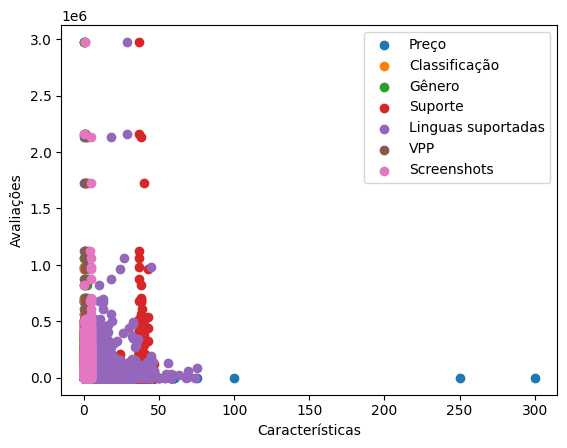

In [281]:
plt.scatter(X['price'], y, label='Preço')
plt.scatter(X['cont_rating'], y, label='Classificação')
plt.scatter(X['prime_genre'], y, label='Gênero')
plt.scatter(X['sup_devices.num'], y, label = 'Suporte')
plt.scatter(X['lang.num'], y, label = 'Linguas suportadas')
plt.scatter(X['vpp_lic'], y, label = 'VPP')
plt.scatter(X['ipadSc_urls.num'], y, label='Screenshots')
plt.legend()
plt.ylabel('Avaliações')
plt.xlabel('Características')
plt.show()

In [282]:
#Transformando em uma mesma escala

std_s = RobustScaler()
X_scaled = std_s.fit_transform(X)

In [283]:
# Decompondo em 3 componentes

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [284]:
pca.explained_variance_ratio_

array([0.54250656, 0.31620803, 0.05087758])

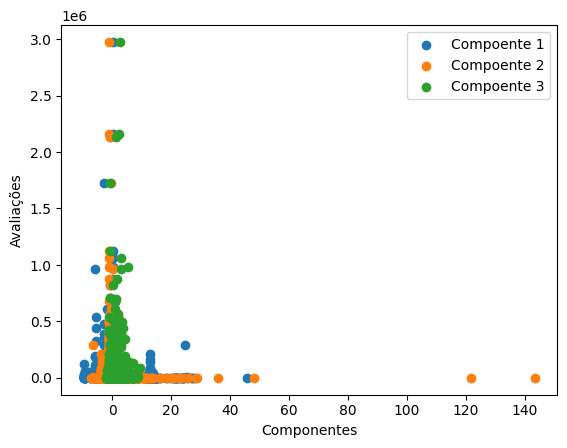

In [285]:
plt.scatter(X_pca[:, 0], y, label='Compoente 1')
plt.scatter(X_pca[:, 1], y, label='Compoente 2')
plt.scatter(X_pca[:, 2], y, label='Compoente 3')
plt.legend()
plt.ylabel('Avaliações')
plt.xlabel('Componentes')
plt.show()

Antes de separar os dados de treino e teste deve-se ser feito a análise do PCA. Na análise do PCA vou usar 'método do cotovelo'.

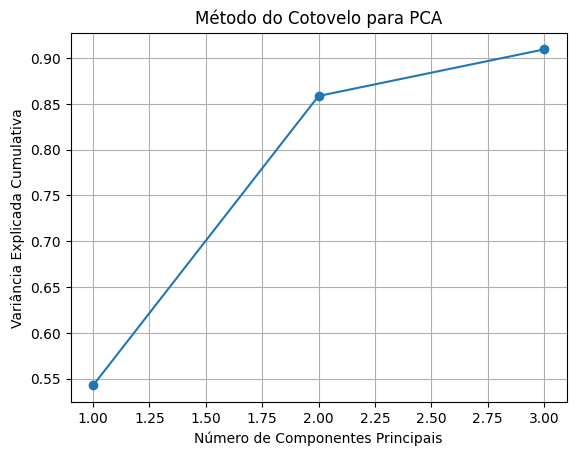

In [286]:
a_pca = pca.explained_variance_ratio_

cumulative = np.cumsum(a_pca)

plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Método do Cotovelo para PCA')
plt.grid(True)
plt.show()

A partir deste gráfico conseguimos ver a dobra (segundo ponto) que determina que no treinamento podemos manter apenas 2 componentes do que 3.

In [287]:
# Separando dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_pca[:, 0:2], y, train_size=0.8, random_state=42)

In [288]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [289]:
# Instanciando os modelos
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_elastic = ElasticNet()
model_knr = KNeighborsRegressor()
model_svr = SVR()
model_dtr = DecisionTreeRegressor()

In [290]:
from sklearn.model_selection import GridSearchCV

In [291]:
params_ridge_lasso_elasticnet = {
    'alpha': range(0, 50)
}
params_grid_knr = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
params_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
params_grid_dtr = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [292]:
grid_ridge = GridSearchCV(estimator=model_ridge, param_grid = params_ridge_lasso_elasticnet, cv=10, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': range(0, 50)},
             scoring='neg_mean_squared_error')

In [293]:
grid_lasso = GridSearchCV(estimator=model_lasso, param_grid = params_ridge_lasso_elasticnet, cv=10, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': range(0, 50)},
             scoring='neg_mean_squared_error')

In [294]:
grid_elastic = GridSearchCV(estimator=model_elastic, param_grid = params_ridge_lasso_elasticnet, cv=10, scoring='neg_mean_squared_error')
grid_elastic.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), param_grid={'alpha': range(0, 50)},
             scoring='neg_mean_squared_error')

In [295]:
grid_knr = GridSearchCV(estimator=model_knr, param_grid = params_grid_knr, cv=10, scoring='neg_mean_squared_error')
grid_knr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [296]:
grid_svr = GridSearchCV(estimator=model_svr, param_grid = params_grid_svr, cv=10, scoring='neg_mean_squared_error')
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [297]:
grid_dtr = GridSearchCV(estimator=model_dtr, param_grid = params_grid_dtr, cv=10, scoring='neg_mean_squared_error')
grid_dtr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [305]:
model_ridge = Ridge(alpha=grid_ridge.best_params_['alpha'])
model_lasso = Lasso(alpha=grid_lasso.best_params_['alpha'])
model_elastic = ElasticNet(alpha=grid_elastic.best_params_['alpha'])
model_knr = KNeighborsRegressor(algorithm=grid_knr.best_params_['algorithm'], n_neighbors=grid_knr.best_params_['n_neighbors'], weights=grid_knr.best_params_['weights'])
model_svr = SVR(C=grid_svr.best_params_['C'], epsilon=grid_svr.best_params_['epsilon'], kernel=grid_svr.best_params_['kernel'])
model_dtr = DecisionTreeRegressor(max_depth=grid_dtr.best_params_['max_depth'], min_samples_leaf=grid_dtr.best_params_['min_samples_leaf'], min_samples_split=grid_dtr.best_params_['min_samples_split'])

In [306]:
model_linear.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)
model_elastic.fit(X_train, y_train)
model_knr.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4)

In [308]:
y_pred_linear = model_linear.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)
y_pred_knr = model_knr.predict(X_test)
y_pred_svr = model_svr.predict(X_test)
y_pred_dtr = model_dtr.predict(X_test)

In [309]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_linear)
mse_elastic = mean_squared_error(y_test, y_pred_linear)
mse_knr = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_linear)
mse_dtr = mean_squared_error(y_test, y_pred_linear)

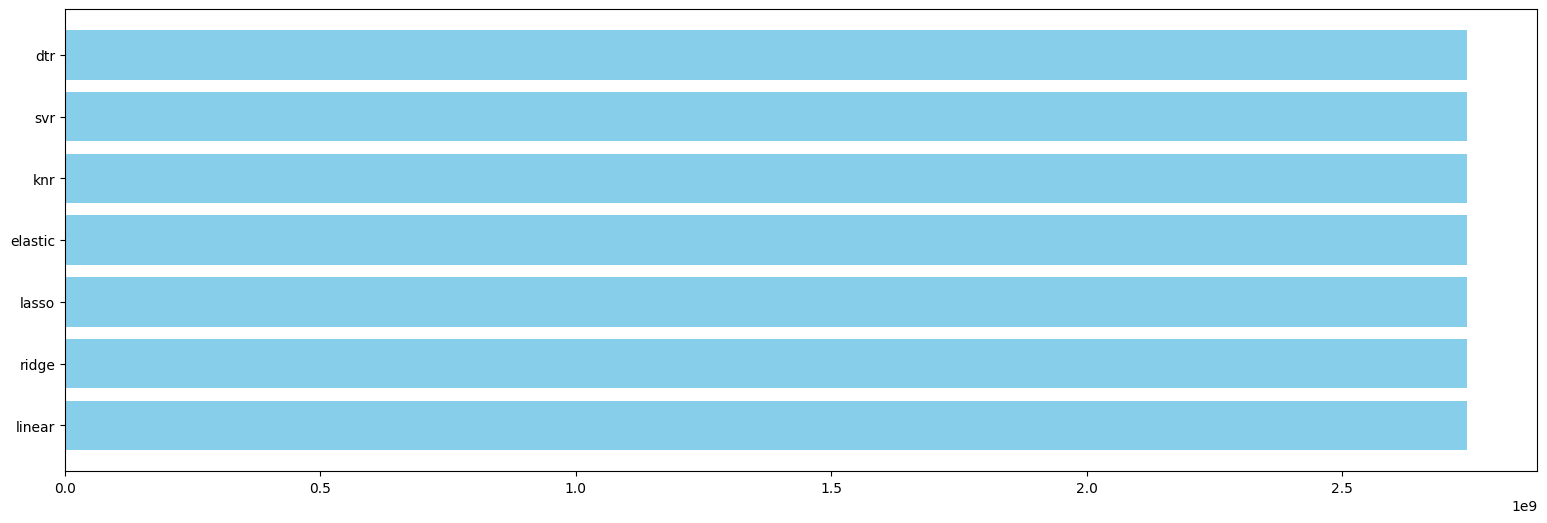

In [325]:
data_score = pd.DataFrame({
    'model': ['linear', 'ridge', 'lasso', 'elastic', 'knr', 'svr', 'dtr'],
    'mse': [mse_linear, mse_ridge, mse_lasso, mse_elastic, mse_knr, mse_svr, mse_dtr]
})

data_score['mse'] = data_score['mse']
data_score = data_score.sort_values('mse', ascending=False)

mean = data_score['mse'] / len(data_score['mse'])

plt.figure(figsize=(19, 6))
plt.barh(data_score['model'], data_score['mse'], color='skyblue')
plt.show()

Como visto não houve nenhuma mudança, mesmo usando outros modelos de predição, ambos ficaram na média de 3.920965e+08 (para um MSE é muito alto)

O que fazer então? Podemos apenas aceitar um destes modelos ou fazer uma abordagem de classificação, ou seja, definir que 40% dos dados para baixo da avaliação é ruim, 20% é bom e 40% para cima da avaliação é bom; mas como o objetivo principal era apenas a análise eu deixarei para a próximo projeoto para não se extender demais.

# Conclusão

Este projeto ele foi dividido em duas partes sendo Análise de Dados e Modelagem Estatística referente a base de dados Apple Store (https://www.kaggle.com/datasets/calibr3io/applestore).


## Análise de Dados

A partir desta base de dados conseguimos obter 6 conhecimos interessantes sobre os aplicativos da Apple Store.

1. Quais são os gêneros e suas frequências? Os 3 gêneros de aplicativos com maior frequência são: Games (Jogos), Entertainment (Entretenimento) e Education (Educação).

2. Qual gênero tem mais avaliação? Os 3 gêneros de aplicativos com mais avaliações são: Games (Jogos), Social Networking (Redes Sociais) e Photo & Videos (Fotos e Vídeos).

3. Qual é classificação de idade que mais predomina na Apple Store? Nesta base de dados possuem 4 classificações (maior frequência para menor frequência), sendo eles respectivamentes: 4+, 12+, 9+ e 17+.

4. Tem mais aplicativo pago ou gratuito? A partir da análise podemos ver que existem 0,77x mais aplicativos gratuitos do que pagos.

5. Entre os aplicativos pagos, qual é o gênero com maior receita? O gênero de aplicativos pagos com maior frequência são: Games (Jogos), Productivity (Produtividade) e Music (Música).

 6. Quais são os aplicativos que possuem a maior receita referente ao seu gênero? Os 3 aplicativos com maior receita e com seus respectivos gêneros são: ＣＲスーパー海物語ＩＮ沖縄４ (Games), iReal Pro - Music Book & Play Along (Music) e 零基础学音标 (Education).

## Modelagem Estatística

Além da análise foi feito uma modelagem estatística. A modelagem estatística neste caso foi feita para prever avaliações com base em 6 variáveis independentes: price, cont_rating, prime_genre, sup_devices.num, lang.num, vpp_lic e ipadSc_urls.num.

O pré-processamento feito para a modelagem estatística foi transformar os dados na mesma escala (RobusterScaler, neste caso eu usei ele, pois o dataset possui outliers) e decompor em 3 componentes principais (PCA). Além de transformar dados categóricos em quantitativos.

O modelo de machine learning usado foi o LinearRegression, Ridge, Lasso, ElasticNet, SVR, DecisionTreeRegressor e KNeighborsRegressor; e ambos usando a métrica mean_squared_erro (MSE) com uma média entre eles de 3.920965e+08.

Uma forma de tentar resolver é tentar usar a Validação Cruzada (Folds) para separar os dados de Treinamento e Teste e ver se melhora os Modelos.